<a href="https://colab.research.google.com/github/Dangelo-dev/Python/blob/main/praticaDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
users	=	[
    {	"id":	0,	"name":	"Hero"	},
    {	"id":	1,	"name":	"Dunn"	},
    {	"id":	2,	"name":	"Sue"	},
    {	"id":	3,	"name":	"Chi"	},
    {	"id":	4,	"name":	"Thor"	},
    {	"id":	5,	"name":	"Clive"	},
    {	"id":	6,	"name":	"Hicks"	},
    {	"id":	7,	"name":	"Devin"	},
    {	"id":	8,	"name":	"Kate"	},
    {	"id":	9,	"name":	"Klein"	}
    ]

In [ ]:
friendships	= [
    (0,	1),
    (0,	2),
    (1,	2),
    (1,	3),
    (2,	3),
    (3,	4),
    (4,	5),
    (5,	6),
    (5,	7),
    (6,	8),
    (7,	8),
    (8,	9)
]

In [ ]:
for user in users:
    user["friends"] = []

In [ ]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [ ]:
def number_of_friends(user):
  """Quantos amigos o usuário tem"""
  return len(user["friends"]) # Tamanho da lista friends_id

total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

24


In [ ]:
from __future__ import division # Divisão inteira está incompleta
num_users = len(users) # Tamanho da lista de usuários
avg_connections = total_connections / num_users # Conexão média = total conexão / total de usuários
print(avg_connections)

2.4


In [ ]:
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
sorted(num_friends_by_id, key=lambda x: x[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [ ]:
 def friends_of_friend_ids_bad(user):
    # 'foaf' é abreviação de 'friend of a friend'
    return [foaf["id"]
            for friend in user["friends"]
            for foaf in friend["friends"]
            ]

friends_of_friend_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [ ]:
print([friend["id"] for friend in users[0]["friends"]])
print([friend["id"] for friend in users[1]["friends"]])
print([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [ ]:
from collections import Counter

def not_the_same(user, other_user):
    """Dois usuários não são os mesmos se possuem ids diferentes"""
    return user['id'] != other_user['id']

def not_friends(user, other_user):
    """Other_user não é um amigo se não está em user[Friends";
    isso é, se é not_the_same com todas as pessoas em user["friends"]"""
    return all(not_the_same(friend, other_user)
    for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"] # Para cada um dos meus amigos
                  for foaf in friend["friends"] # que contam *their* amigos
                  if not_the_same(user, foaf) # que não seja eu
                  and not_friends(user, foaf)) # e que não são meus amigos

print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [ ]:
interests	=	[
    (0,	"Hadoop"), (0,	"Big	Data"), (0,	"HBase"),	(0,	"Java"), (0,	"Spark"),	(0,	"Storm"),	(0,	"Cassandra"),
    (1,	"NoSQL"),	(1,	"MongoDB"),	(1,	"Cassandra"),	(1,	"HBase"), (1,	"Postgres"),
    (2,	"Python"),	(2,	"scikit-learn"),	(2,	"scipy"), (2,	"numpy"),	(2,	"statsmodels"),	(2,	"pandas"),
    (3,	"R"),	(3,	"Python"), (3,	"statistics"),	(3,	"regression"),	(3,	"probability"),
    (4,	"machine	learning"),	(4,	"regression"),	(4,	"decision	trees"), (4,	"libsvm"),
    (5,	"Python"),	(5,	"R"),	(5,	"Java"),	(5,	"C++"), (5,	"Haskell"),	(5,	"programming	languages"),
    (6,	"statistics"), (6,	"probability"),	(6,	"mathematics"),	(6,	"theory"),
    (7,	"machine	learning"),	(7,	"scikit-learn"),	(7,	"Mahout"), (7,	"neural	networks"),
    (8,	"neural	networks"),	(8,	"deep	learning"), (8,	"Big	Data"),	(8,	"artificial	intelligence"),
    (9,	"Hadoop"), (9,	"Java"),	(9,	"MapReduce"),	(9,	"Big	Data")
]

In [ ]:
def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [ ]:
from collections import defaultdict

# as chaves são interesses, os valores são listas de user_ids com interests
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

# as chaves são user_ids, os valores são as listas de interests para aquele user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [ ]:
def most_commom_interests_with(user):
    return Counter(interested_user_id
                   for interest in interests_by_user_id[user["id"]]
                   for interested_user_id in user_ids_by_interest[interest]
                   if interested_user_id != user["id"])
print(most_commom_interests_with(users[0]))

Counter({9: 3, 1: 2, 8: 1, 5: 1})


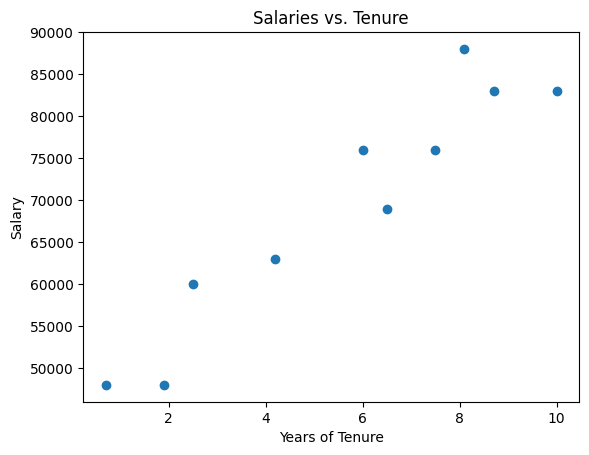

In [ ]:
import matplotlib.pyplot as plt

# dados de salários e tempos de permanencia
salaries_and_tenures	=	[
    (83000,	8.7),	(88000,	8.1),
    (48000,	0.7),	(76000,	6),
    (69000,	6.5),	(76000,	7.5),
    (60000,	2.5),	(83000,	10),
    (48000,	1.9),	(63000,	4.2)
]

# separar os dados em duas listas: salários e tempos de permanencia
salaries	=	[salary for salary, tenure in salaries_and_tenures]
tenures	=	[tenure for salary, tenure in salaries_and_tenures]

# criar o scatter plot
plt.scatter(tenures, salaries)

# adicionar titulo e rótulo aos eixos
plt.title("Salaries vs. Tenure")
plt.xlabel("Years of Tenure")
plt.ylabel("Salary")

# Exibir o gráfico
plt.show()

In [ ]:
salary_by_tenure = defaultdict(list)

# as chaves são os anos, os valores são as listas dos salarios para cada ano
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# as chaves são os anos, cada valor é a média salarial para aquele ano
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [ ]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "menos de dois"
    elif tenure < 5:
        return "entre dois e cinco"
    else:
        return "mais de cinco"

In [ ]:
# as chaves são agrupamentos dos casos, os valores são as listas dos salários para aquele agrupamento
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

# as chaves são agrupamentos dos casos, cada valor é a média salarial para aquele agrupamento
average_salary_by_bucket = {
      tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'mais de cinco': 79166.66666666667,
 'menos de dois': 48000.0,
 'entre dois e cinco': 61500.0}

In [ ]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience <8.5:
        return "unpaid"
    else:
        return "paid"

In [ ]:
words_and_counts = Counter(word
                          for user, interest in interests
                          for word in interest.lower().split())
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [ ]:
for i in [1, 2, 3, 4, 5]:
    print (i) # primeira linha para o bloco "for i"
    for j in [1, 2, 3, 4, 5]:
      print (j) # primeira linha para o bloco "for j"
      print (i + j) # ultima linha para o bloco "for j"
    print (i) # ultima linha para o bloco "for i"
print ("done looping")

1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
done looping


In [ ]:
long_winded_computation	=	(1	+	2	+	3	+	4	+	5	+	6	+	7	+	8	+	9	+	10	+	11	+	12	+ 13	+	14	+	15	+	16	+	17	+	18	+	19	+	20)

In [ ]:
list_of_lists	=	[[1,	2,	3],	[4,	5,	6],	[7,	8,	9]]
easier_to_read_list_of_lists	=	[	[1,	2,	3],
                                            [4,	5,	6],
                                            [7,	8,	9]	]

In [ ]:
two_plus_three	=	2	+	\
                  3

In [ ]:
import regex as re
my_regex = re.compile("[0-9]+", re.I)

In [ ]:
from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()

In [ ]:
def double(x):
  # aqui	é	onde	você	coloca	um	docstring	(cadeia	de	caracteres	de	documentação)
  # opcional que explica	o	que	a	função	faz. por	exemplo,	esta	função	multiplica	sua	entrada	por	2"""
    return x * 2

print (double(2))

4


In [ ]:
def apply_to_one(f):
    # Chama a função f com 1 como seu argumento
    return f(1)

my_double = double # refere-se à função definida anteriormente
x = apply_to_one(my_double) # é igual a 2
print(x)

2


In [ ]:
y = apply_to_one(lambda x: x + 4) # é igual a 5
print(y)

5


In [ ]:
another_double = lambda x: 2 * x # não faça isso
def another_double(x): return 2 * x # faça isso

In [ ]:
def my_print(message = "my default message"):
    print(message)

my_print("hello") # exibe 'hello'
my_print() # exibe 'my default message'

hello
my default message


In [ ]:
def subtract(a=0, b=0):
    return a - b

subtract(10, 5) # é igual a 5
subtract(0, 5) # é igual a -5
subtract(b=5) # é o mesmo que o anterior

-5

In [ ]:
integer_list = [1, 2, 3]
heterogenous_list = ["string", 0.1, True]
list_of_lists = [integer_list, heterogenous_list, [] ]

list_lenght = len(integer_list)
print(list_lenght)

list_sum = sum(integer_list)
print(list_sum)

3
6


In [ ]:
x = list(range(10)) # é a lista [0, 1, ..., 9]
zero = x[0] # é igual a 0, as listas são indexadasa a partir de 0
one = x[1] # é igual a 1
nine = x[-1] # é igual a 9, 'Pythonic' para o último elemento
eight = x[-2] # é igual a 8, 'Pythonic para o anterior ao último elemento
x[0] =-1 # agora x é [-1, 1, 2, 3, ..., 9]

first_three = x[:3] # [-1,1,2]
three_to_end = x[3:] # [3,4,...,9]
one_to_four = x[1:5] # [1,2,3,4]
last_three = x[-3:] # [7,8,9]
without_first_and_last = x[1:-1] # [1,2,...,8]
copy_of_x = x[:] # [-1,1,2,...,9]

In [ ]:
1 in [1,2,3,] # Verdadeiro
0 in [1,2,3,] # Falso

False

In [ ]:
x = [1,2,3]
y = x + [4,5,6] # y é [1,2,3,4,5,6]
x.extend([4,5,6]) # x é [1,2,3,4,5,6]

In [ ]:
x = [1,2,3]
x.append(0) # x é [1,2,3,0]
y = x[-1] # y é 0
z = len(x) # é igual a 4

x,y = [1,2]  # agora x é 1, y é 2
_,y = [1,2] # agora y == 2, não se preocupou com o primeiro elemento

In [ ]:
my_list = [1,2,3]
my_tuple = (1,2,3)
other_tuple = 1,2,3
my_list[1] = 3 # my_list agora é [1,3]
try:
    my_tuple[1] = 3
except TypeError:
    print("cannot modify a tuple")

cannot modify a tuple


In [ ]:
def sum_and_product (x,y):
    return (x+y), (x*y)

sp = sum_and_product(2,3)
s, p = sum_and_product(5,10)
print(sp, s, p)

(5, 6) 15 50


In [ ]:
x, y = 1, 2 # x é 1 e y é 2
x,y = y,x # agora x é 2 e y é 1

In [ ]:
empty_dict = {}
empty_dict2 = dict()
grades = { "Joel" : 80, "Tim" : 95 } # dicionário literal
joels_grade	=	grades["Joel"] # é igual a 80
try:
    kates_grade = grades["Kate"]
except KeyError:
    print("no grade for Kate!")

joel_has_grade = "joel" in grades # True
kate_has_grade = "kate" in grades # False

grades["Tim"] = 99 # substitui o antigo valor
grades["Kate"] = 100 # adiciona uma terceira entrada
num_students = len(grades) # é igual a 3

no grade for Kate!


In [29]:
tweet	=	{
    "user"	:	"joelgrus",
    "text"	:	"Data	Science	is	Awesome",
    "retweet_count"	:	100,
    "hashtags"	:	["#data",	"#science",	"#datascience",	"#awesome",	"#yolo"]
}

tweet_keys = tweet.keys() # lista de chaves [user, text, retweet_count, hashtags]
tweet_values = tweet.values() # lista de valores
tweet_items = tweet.items() # lista de tuplas (chave, valor)

"user" in tweet_keys # True, mas usa list in, mais lento
"user" in tweet # Mais Pythonic, usa dict in, mais rápido
"joelgrus" in tweet_values # True

True

In [ ]:
from collections import defaultdict

document = {}

word_counts = defaultdict(int) # int() produz 0
for word in document:
    word_counts[word] += 1

dd_list = defaultdict(list) # list() produz uma lista vazia
dd_list[2].append(1) # agora dd_list contém {2:[1]}
dd_dict = defaultdict(dict) # dict() produz um dicionário vazio
dd_dict["Joel"]["City"] = "Seattle" # { "Joel" : {"City": "Seattle"}}
dd_pair = defaultdict(lambda: [0,0]) # [0,0] produz uma lista com dois zeros
dd_pair[2][1] = 1 # agora dd_pair contém {2:[0,1]}

c	=	Counter([0,	1,	2,	0]) #	c	é	(basicamente)	{	0	:	2,	1	:	1,	2	:	1	}
word_counts	=	Counter(document)

#	imprime	as	dez	palavas	mais	comuns	e	suas	contas
for	word,	count	in	word_counts.most_common(10):
  print	(word,	count)

In [ ]:
# Conjuntos (set)
s = set()
s.add(1) # s agora é { 1 }
s.add(2) # s agora é { 1,2 }
s.add(2) # s não muda
x = len(s) # é igual a 2
y = 2 in s # é igual a True
z = 3 in s # é igual a False


stopwords_list	=	["a","an","at"]	+	["yet",	"you"]
"zip" in stopwords_list # Falso, mas tem que verificar todos elementos
stopwords_set = set(stopwords_list)
"zip" in stopwords_set # muito rápido para verificar

item_list = [1,2,3,1,2,3]
num_items = len(item_list) # 6
item_set = set(item_list) # {1,2,3}
num_distinct_items = len(item_set) # 3
distinct_item_list = list(item_set) # [1,2,3]


In [ ]:
# Controle de Fluxo
if 1 > 2:
    message = "if only 1 were greater than two..."
elif 1 > 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"

parity = "even" if x % 2 == 0 else "odd"

x = 0
while x < 10:
    print(x, "is less than 10")
    x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [14]:
# Ordenação

x = [1,4,2,3]
y = sorted(x) # não altera a ordem de x
x.sort() # altera a ordem de x, agora é [1,2,3,4]

# Por padrão, 'sort' e 'sorted' organizam a lista baseado do menor para o maior

# Para inverter a ordem, pode ser utilizado o 'reverse = True'
x = [4,1,2,3]
x.sort(reverse=True) # agora é [4,3,2,1]

# Organiza as palavras e contagens da mais alta para a mais baixa
word_counts = {}
wc = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

In [28]:
# Compreensões de Lista

even_numbers = [x for x in range(5) if x % 2 == 0] # [0,2,4]
squares = [ x * x for x in range(5)] # [0,1,4,9,16]
even_squares = [x * x for x in even_numbers] # [0,4,16]
square_dict = {x : x * x for x in range(5)} # { 0:0, 1:1, 2:4, 3:9, 4:16 }
square_set = { x * x for x in [1, -1]} # { 1 }
zeroes = [0 for _ in even_numbers] # [0,0,0]
pairs = [(x,y)
         for x in range(10)
         for y in range(10)] # 100 pairs (0,0)(0,1)...(9,8),(9,9)
increasing_pairs = [(x,y) # somente pares com x < y
                    for x in range(10) # range (lo, hi) é igual a
                    for y in range(x+1, 10)] # [lo, lo + 1,..., hi -1]

In [38]:
# Geradores e Iteadores

def lazy_range(n):
    # Uma versão preguiçosa de range
    i = 0
    while i < n:
        yield i
        i += 1

for i in lazy_range(10):
    print(i)

def natural_numbers(): # Embora não deve iterar sobre ela sem usar alguma lógica de 'break'
    # retorna 1,2,3,...
    n = 1
    while True:
        yield n
        n += 1

# Segunda forma de criar geradores, usando for dentro de parenteses
lazy_evens_below_20 = (i for i in lazy_range(20) if i % 2 == 0)

0
1
2
3
4
5
6
7
8
9


In [63]:
# Aleatoriedade

import random

four_uniform_randoms = [random.random() for _ in range(4)]
four_uniform_randoms # random.random() produz numeros uniformes entre 0 e 1

random.seed(10) # configura seed para 10
print (random.random()) # 0.5714025946899135
random.seed(10) # reinicia seed para 10
print (random.random()) # 0.5714025946899135 novamente

random.randrange(10) # escolhe aletoriamente de range(10) = [0,1,...,9]
random.randrange(3,6) # escolhe aleatoriamente de range(3,6) = [3,4,5]

up_to_ten = (list(range(10)))
random.shuffle(up_to_ten) # embaralha a lista

my_best_friend = random.choice(["Alice"	,"Bob"	,"Charlie"])
my_best_friend # escolha aleatória dentre os elementos da lista

lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6)
winning_numbers # 6 números aleatórios sem repetição

four_with_replacement = [random.choice(range(10)) for _ in range(4)]
four_with_replacement # 4 números aleatórios com repetição

0.5714025946899135
0.5714025946899135


[2, 9, 5, 6]

In [64]:
# Expressões regulares

import re

print (all([ # Todos são verdadeiros porque
    not re.match("a", "cat"), # 'cat' não começa com 'a'
    re.search("a", "cat"), # 'cat' possui 'a'
    not re.search("c", "dog"), # 'dog' não possui um 'c'
    3 == len(re.split("[ab]", "carbs")), # divide em a ou b para ['c','r','s']
    "R-D-" == re.sub("[0-9]", "-" , "R2D2") # substitui todos os dígitos por traços
])) # Imprime True

True


In [65]:
# POO

# por convenção, damos nomes PascalCase às classes
class Set:
    # estas sçai as funções de membro
    # cada uma pega um parâmetro "self" (outra convenção)
    # que se refere ao objeto set sendo usado em questão
    def __init__(self, values=None):
        """Estre é o construtor.
        Ele é chamado quando você cria um novo Set.
        Você deveria usá-lo como
        s1 = Set() # Conjunto Vazio
        s2 = Set([1,2,2,3]) # Inicializa com valores"""
        self.dict = {} # Cada instância de set possui sua própria propriedade dict que é o que usaremos para rastrear as associações
        if values is not None:
            for value in values:
                self.add(value)

    def __repr__(self): # Representação do objeto
        return "Set: " + str(self.dict.keys())

    # Representaremos a associação como uma chave em self.dict com valor True
    def add(self, value):
        self.dict[value] = True

    # Valor está no Set se ele for uma chave no dicionário
    def contains(self, value):
        return value in self.dict

    # Remove um valor do Set
    def remove(self, value):
        del self.dict[value]

# Poderiamos usar da seguinte forma
s = Set([1,2,3])
s.add(4)
print (s.contains(4)) # True
s.remove(3)
print(s.contains(3)) # False

True
False


In [72]:
# Ferramentas Funcionais

def exp(base, power): # uma função com duas variaveis
    return base ** power

def two_to_the(power): # uma função com uma variavel
    return exp(2, power)

two_to_the(3) # é igual a 8

# uma abordagem diferente é usar functools.partial
from functools import partial, reduce
two_to_the = partial(exp, 2) # agora é uma função de uma variável
two_to_the(3) # é igual a 8

# também é possivel usar partial para preencher os argumentos que virão depois se for especificado seus nomes
square_of = partial(exp, power=2)
square_of(3) # é igual a 9

# adicionar argumentos no meio da função deixa o código bagunçado, melhor evitar
# ocasionalmente usaremos 'map', 'reduce' e 'filter', que fornecem alternativas funcionais para compreensão de lista

def double(x):
    return x * 2

xs = [1,2,3,4]
twice_xs = [double(x) for x in xs] # [2,4,6,8]
twice_xs = map(double, xs) # é a mesma coisa
list_doubler = partial(map, double) # função que duplica a lista
twice_xs = list_doubler(xs) # novamente [2,4,6,8]

# é possivel usar 'map' com funções de multiplos argumentos se fornecer multiplas listas
def multiply(x,y): return x * y
products = map(multiply, [1,2], [4,5]) # [4,10]

# igualmente 'filter' faz o trabalho de uma compeensão de lista 'if'
def is_even(x):
    # True se x for par, False se x for impar
    return x % 2 == 0

x_evens = [x for x in xs if is_even(x)] # [2,4]
list_product = partial(reduce, multiply) # função que reduz uma lista
x_product = list_product(xs) # novamente = 24

In [81]:
# Enumeração (enumerate)
documents = {}
# não é Pythonic
for i in range(len(documents)):
    document = documents[i]
    print(i, document)

# também não é Pythonic
i = 0
for document in documents:
    print(i, document)
    i += 1

# A solução Pythonic é 'enumerate' (enumerar), que produz tuplas (index, element)
for i, document in enumerate(documents):
    print(i, document)

# da mesma forma, se quisermos os indices
for i in range(len(documents)): print(i) # não é Pythonic
for i, _ in enumerate(documents): print(i) # é Pythonic

In [87]:
# Descompactação de Zip e Argumentos

# zip transforma listas múltiplas em uma única lista de tuplas de elementos correspondentes
list1 = ['a','b','c']
list2 = [1,2,3]
zip(list1, list2) # é [('a',1), ('b',2), ('c',3)]
# se as listas são de tamanhos diferentes, 'zip' para assim que a primeira lista acabar

pairs = [('a',1), ('b', 2), ('c',3)]
letters, numbers = zip(*pairs)

# é possivel usar a decompatação de argumento com qualquer função
def add(a,b): return a + b
add(1,2) # retorna 3
#add([1,2]) # TypeError!
add(*[1,2]) # retorna 3

3

In [95]:
# Args e kwargs

"""Digamos que queremos criar	uma	função de ordem	alta que tem como	entrada
uma	função f e retorna uma função	nova que retorna duas vezes	o	valor	de f
para qualquer entrada"""
def doubler(f):
    def g(x):
        return 2 * f(x)
    return g

# Isso funciona em alguns casos
def f1(x):
    return x + 1

g = doubler(f1)
print(g(3)) # 8 (==(3 + 1) * 2)
print(g(-1)) # 0 (==(-1 + 1) * 2)

# no entanto, ele falha com funções que possuem mais de um unico argumento
def f2(x,y):
    return x + y

g = doubler(f2)
# print(g(1,2)) # TypeError: g() pega exatamente 1 argumento (2 dados)

def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)

magic(1, 2, key="word", key2="word2")
# unnamed args: (1, 2)
# keyword args: {'key': 'word', 'key2': 'word2'}

# em funções como essa, 'args' é uma tupla dos seus argumentos sem nome
# e 'kwargs' é um dicionário dos seus argumentos com nome

# Funciona de forma contrária também. usando uma list (ou tuple) e dict para fornecer argumentos para uma função
def other_way_magic(x, y, z):
    return x + y + z

x_y_list = [1,2]
z_dict = { "z" : 3 }
print(other_way_magic(*x_y_list, **z_dict)) # 6

def doubler_correct(f):
    # funciona não importa que tipo de entradas f espera
    def g(*args, **kwargs):
        # quaisquer argumentos com os quais g é fornecido, os passa para f
        return 2 * f(*args, **kwargs)
    return g

g = doubler_correct(f2)
print(g(1,2)) # 6

8
0
unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}
6
6


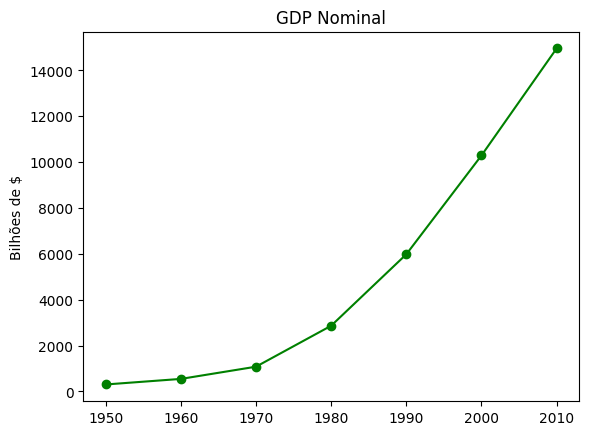

In [97]:
# matplotlib
from matplotlib import pyplot as plt

years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1075.9,2862.5,5979.6,10289.7,14958.3]

# cria um gráfico de linha, anos no eixo x, gdp no eixo y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title('GDP Nominal') # adiciona um título
plt.ylabel('Bilhões de $') # adiciona um selo no eixo y
plt.show()